<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.S50x Course Team, Copyright 2021 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# RECITATION 4: Likelihoods and the $\chi^2$ Function

<br>
<!--end-block--> 

<!--start-block-->
<hr style="height: 1px;">

## 4.0 Overview of Learning Objectives

In this recitation we will explore the following objectives:

- Understand and construct likelihood and log-likelihood functions
- Examine the $\chi^2$ metric
- Perform a fit by maximizing a log-likelihood function using `lmfit`


<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 4.1 Warm-up Exercise

Let $x_i$ be the x coordinates of the data points we observe, and let $f(x_i)$ be the model we are trying to fit. We assume that the data that we observe is generated from this model with some extra error, usually do to some sort of noise.

$$y_i = f(x_i) + \epsilon $$

where $\epsilon$ is a random variable drawn from a Gaussian distribution with mean $0$. Usually, in most physics experiments, we will be able to quantify the width of the distribution by making repeated measurements and calculating the standard error, which will give us a vector of standard errors, $\sigma_i$, which are usually plotted as errorbars like in the plot above.

<!--start-block-->
#### <span style="color:red">>>>QUESTION 4.1</span>

a) So, we assume that $y_i$ is a random variable with mean $f(x_i)$, and variance $\sigma_i^2$. Given this, what is the probability distribution for $y_i$?

The probability distribution is given by 

$$P(y_i) = \frac{1}{\sigma_i\sqrt{2\pi}} \exp\left( -\frac{1}{2} \frac{(y_i - f(x_i))^2}{\sigma_i^2}\right)$$

b) Given the answer to (a), and assuming that the probability distributions for each of the $y_i$ are independent, what is the joint probability distribution?

If we assume each of the $y_i$ are indpendent random variables, we have the joint probabilty distribution given by

$$P(y_1, y_2, ... ) = \frac{1}{(2\pi)^{k/2}\prod_i\sigma_i} \exp\left( -\frac{1}{2} \sum_i\frac{(y_i - f(x_i))^2}{\sigma_i^2}\right)$$



<!--start-block-->
<hr style="height: 1px;">

## 4.2 The Likelihood Function

The previous exercise gives the probability distribution of observing the data $y$ given a particular model $f(x)$ as a function of the independent data points $x$ and its parameters $\alpha_1, \alpha_2, \alpha_3, ..., \alpha_m $. This is known as the <b>likelihood</b> function $P(y|\alpha)$. Note that the probability of observing the data given a particular model is *not* the same as the probability of a particular model being true given observed data (although they are related). To begin, however, we will assume that if we find the model that maximizes the probability of the observed data, this model is close to the true model. This technique is called <b>Maximum Likelihood Estimation</b> (MLE).

Suppose we take the errors $\epsilon$ in $y_i = f(x_i; \alpha) + \epsilon $ to be sampled from some general distribution $\rho(y_i - f(x_i, \alpha))$ instead of a Gaussian. We can then construct a  likelihood $P(y|\alpha)$ (and corresponding log-likelihood) function:

$$ P(y|\alpha) = \prod_i \rho(y_i - f(x_i; \alpha))$$

Maximizing this liklihood with respect to the set of parameters $\alpha$ will give us the parameterization of the model that best fits the given data. However, it is often more convenient (and more common) to maximize $\log(P(y|\alpha))$ instead.
<br>

#### <span style="color:red">>>>QUESTION 4.2</span>


Why is it okay to use the log likelihood instead of the likelihood for our likelihood function?

Hint: what is the only purpose of the likelihood function we have mentioned so far? How is it affected by taking the log?

#### <span style="color:red">>>>ANSWER</span>

Because we really only care about the extra of the function, and the extrma's x-location of a function f(x) is the same x-location of the extreama of the function log(f(x))

<!--
#solution
Since all we need to do is maximize $P(y|\alpha)$, and because the logarithm is a monotonically increasing function, maximizing $\log( P(y|\alpha))$ is equivalent to maximizing $ P(y|\alpha) $
-->

<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 4.2 Maximum Likelihood Estimation for Gaussian Errors

Let's return to having $\epsilon$ in $y_i = f(x_i) + \epsilon $ be a Gaussian distribution. The likelihood distribution is just what we calculated in Question 4.1(b).

We would like to find the parameters that maximize the likelihood distribution,  i.e.

$$\alpha^{\text{best}}_j = \text{argmax}_{\alpha_j} \left( \frac{1}{(2\pi)^{k/2}\prod_i\sigma_i} \exp\left( -\frac{1}{2} \sum_i\frac{(y_i - f(x_i; \alpha_1, \alpha_2, ...))^2}{\sigma_i^2}\right)\right)$$

We know that since the logarithm is a monotonically increasing function, if we maximize the logarithm of this function, we maximize the function itself. This means that

$$\alpha^{\text{best}}_j = \text{argmax}_{\alpha_j} \left( -\frac{1}{2} \sum_i\frac{(y_i - f(x_i; \alpha_1, \alpha_2, ...))^2}{\sigma_i^2} - \sum_i \log (\sigma_i\sqrt{2\pi}) \right)$$

The term involving the $\sum_i \log (\sigma_i\sqrt{2\pi})$ is a constant for the data, so we can ignore it in the maximization. 


$$\alpha^{\text{best}}_j = \text{argmax}_{\alpha_j} \left( -\frac{1}{2} \sum_i\frac{(y_i - f(x_i; \alpha_1, \alpha_2, ...))^2}{\sigma_i^2}  \right)$$

We know that the $-\frac{1}{2}$ in front just multiplies by a constant. So, if we want to maximize a function $-\frac{1}{2}g(z)$ with respect to $z$, we can just minimize $g(z)$ with respect to $z$, which means that

$$\alpha^{\text{best}}_j = \text{argmin}_{\alpha_j} \left(\sum_i\frac{(y_i - f(x_i; \alpha_1, \alpha_2, ...))^2}{\sigma_i^2}  \right)$$



<hr style="height: 1px;">

## 4.3 The $\chi^2$ Function

The maximum likelihood solution for the parameters can be found by minimizing the sum of squared residuals divided by the variance. This sum has a name, and it known as the $\chi^2$. It is defined again, as

$$\chi^2(\alpha_1, \alpha_2 ... \alpha_m) = \sum_i\frac{(y_i - f(x_i; \alpha_1, \alpha_2, ...))^2}{\sigma_i^2}$$

So, many fitting problems that you will encounter come down to minimizing this sum. In lecture, we had a similar sum, but without the $\sigma_i^2$ in the denominator. If we assume that each point has the same uncertainty, than minimizing this $\chi^2$ is the same as minimizing the sum we saw in lecture. This technique that I'm showing you is known as <b>weighted least squares</b>, as opposed to the derivation we saw in lecture that was <b>ordinary least squares</b>.

In lecture, we saw how this can be solved analytically, using linear algebra or vector calculus. However, we can use the computer to numerically minimize the chi-square. The most famous of these techniques is known as gradient descent, which will be covered in one of the lectures, and is what the Python package lmfit uses. However, now we will delve deeper into the significance of chi-square and how we can use it to assess goodness of fit.

<!--start-block-->

Let's see what chi-squared tells us about data on a histogram. Run the code below to read data from a file and plot...


<!--
#initial code

-->

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare

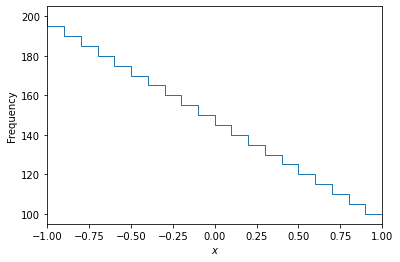

In [2]:
# model
pred = np.genfromtxt('chisq_model.txt', delimiter=',')    # read in file
x = np.array([n[0] for n in pred])    # get x values
pred_y = [n[1] for n in pred]    # get y values
plt.xlim(-1,1)
plt.xlabel(r'$x$')
plt.ylabel(r'Frequency')
plt.plot(x,pred_y,linewidth=1,drawstyle='steps')
plt.show()

<!--start-block-->

Next, sample errors from a normal distribution and plot the data from "chisq_data1.txt" with Poisson error bars.


<!--
#initial code

-->

In [3]:
def plot_error(y):
    plt.errorbar(x,y,yerr=np.sqrt(y),ecolor='k',elinewidth=1,capsize=4,linestyle='')

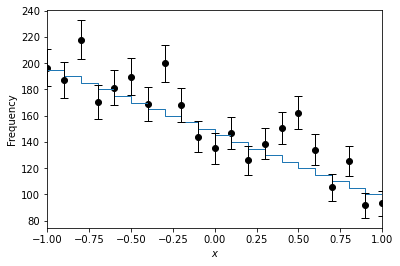

In [4]:
data1 = np.loadtxt('chisq_data1.txt', delimiter=',')    # read in file
plt.xlim(-1,1)
plt.xlabel(r'$x$')
plt.ylabel(r'Frequency')
plt.plot(x,pred_y,linewidth=1,drawstyle='steps')
plt.scatter(x,data1,c='k')
plot_error(data1)

<!--start-block-->

Compute and print the Chi-squared coefficient and probability.


<!--
#initial code

-->

In [5]:
chi2,p = chisquare(data1,pred_y)
print("Chi-squared:",chi2)
print("Probability: {:.4%}".format(p)) #a bit dodgy!

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.026354236990057164

<!--start-block-->

Try again for a different set of data, called "chisq_data2.txt". Again, compute and print the Chi-squared coefficient and probability.


<!--
#initial code

-->

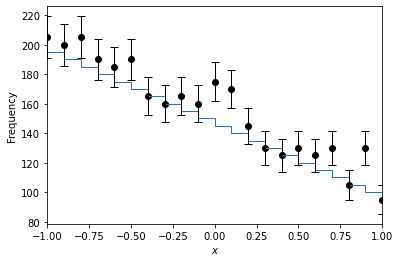

In [6]:
data2 = np.loadtxt('chisq_data2.txt', delimiter=',')    # read in file
plt.xlim(-1,1)
plt.xlabel(r'$x$')
plt.ylabel(r'Frequency')
plt.plot(x,pred_y,linewidth=1,drawstyle='steps')
plt.scatter(x,data2,c='k')
plot_error(data2)

In [7]:
chi2,p = chisquare(data2,pred_y)
print("Chi-squared:",chi2)
print("Probability: {:.2%}".format(p)) #quite consistent!

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.04285714285714286

<!--start-block-->

Try again for a different set of data, called "chisq_data3.txt". Again, compute and print the Chi-squared coefficient and probability.


<!--
#initial code

-->

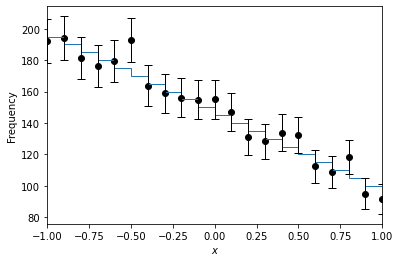

In [8]:
data3 = np.loadtxt('chisq_data3.txt', delimiter=',')    # read in file
plt.xlim(-1,1)
plt.xlabel(r'$x$')
plt.ylabel(r'Frequency')
plt.plot(x,pred_y,linewidth=1,drawstyle='steps')
plt.scatter(x,data3,c='k')
plot_error(data3)

In [9]:
chi2,p = chisquare(data3,pred_y)
print("Chi-squared:",chi2)
print("Probability: {:.2%}".format(p)) #too consistent...

ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.014609913484252897

<!--start-block-->
<hr style="height: 1px;">

## 4.4 A Fitting Example

To investigate the first step of the minimization process, let's look at a different example.

Suppose you're an astrophysicist looking at a distant star. Photons hit your telescope at random, independent intervals, so the the number that you detect within your period of observation is Poisson distributed.

Also, this star is really important, and $N\gg 1$ telescopes are looking at it. Your data $D$ is therefore is $\{n_1, n_2, \dots, n_N\}$ which is the counts observed by the telescopes during one day.

<!--start-block-->
Let's generate some Poisson-distributed sample data for each telescope. We'll assume a parameter of $\lambda=5$ counts per day, with $N=100$ telescopes.

<!--
#initial code
import numpy as np

LAMBDA = 5
N = 100

counts = np.random.poisson(LAMBDA, N);
-->

<!--end-block-->

In [10]:
import numpy as np

LAMBDA = 5
N = 100

counts = np.random.poisson(LAMBDA, N);

<!--start-block-->

Since each telescope's detection $n_i$ is independent, the probability of detecting data set $D$ given some estimate of $\lambda$, which is the parameter, is simply the product of the probability for each telescope to detect $n_i$. This probability is Poisson distributed.

We would like to use `LMFIT`'s minimize function, which does not actually request the likelihood as an input. Instead, it asks for the logarithm of the likelihood of each data point, and assumes that each data point is independent. Internally, it adds all the likelihoods from all data points to get the log-likelihood of the data.

<!--
#initial code
import numpy as np
from scipy.stats import poisson

def log_likelihood(l, data):
    return np.log(poisson.pmf(data, l))
-->

In [11]:
import numpy as np
from scipy.stats import poisson

def log_likelihood(l, data):
    return np.log(poisson.pmf(data, l))

<!--start-block-->

Use `LMFIT`'s minimize function to maximize the likelihood (i.e. minimize the negative likelihood) and recover our $\lambda=5$ value.

<!--
#initial code
from lmfit import minimize, fit_report

def negative_log_likelihood(l, data):
    return -log_likelihood(l, data)

params = Parameters()
params.add('l', min=0, value=1)

result = minimize(negative_log_likelihood, params, args=(counts,))
print(fit_report(result))
-->

<!--end-block-->

In [12]:
from lmfit import Parameters, minimize, fit_report

def negative_log_likelihood(l, data):
    return -log_likelihood(l, data)

params = Parameters()
params.add('l', min=0, value=1)

result = minimize(negative_log_likelihood, params, args=(counts,))
print(fit_report(result))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 23
    # data points      = 100
    # variables        = 1
    chi-square         = 482.432357
    reduced chi-square = 4.87305411
    Akaike info crit   = 159.367053
    Bayesian info crit = 161.972223
[[Variables]]
    l:  4.70034279 +/- 0.52393235 (11.15%) (init = 1)


Now let's plot the data, true distribution, and best fit distribution.

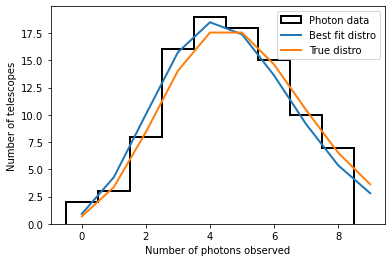

In [13]:
bins = np.arange(np.max(counts)+1)-0.5
xs = bins+0.5
plt.hist(counts, bins=bins, label="Photon data", fill=False, histtype="step", color='k', linewidth=2)
plt.plot(xs, N * poisson.pmf(xs, result.params['l'].value), label="Best fit distro", color="C0", linewidth=2)
plt.plot(xs, N * poisson.pmf(xs,LAMBDA), label="True distro", color="C1", linewidth=2)

plt.xlabel("Number of photons observed")
plt.ylabel("Number of telescopes")
plt.legend()

<!--start-block-->
#### <span style="color:red">>>>EXERCISE 4.1</span>

To take into effect the uncertainty on $\lambda$, compute the Poisson distribution not just for the best fit value of $\lambda$, but also for $\lambda - 2\sigma_\lambda$, $\lambda+2\sigma_\lambda$, and ten $\lambda$s in between. Store those results in a list. Here, $\sigma_\lambda$ is the uncertainty on $\lambda$ generated by the fit and you can get it with `result.params['l'].stderr`.

Use the code from above and add an error band (`plt.fill_between`) where the lower edge of the error band in each bin represents the lowest number of telescopes predicted among all the distributions you computed above, and the higher edge represents the highest number of telescopes.

Please ask for help if you're confused about how to do this or about what you're being asked to do.

<!--
#initial code
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

#your code here
-->

<!--
#solution
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

bins = np.arange(np.max(counts)+1)-0.5
xs = bins+0.5
plt.hist(counts, bins=bins, label="Photon data", fill=False, histtype="step", color='k', linewidth=2)
plt.plot(xs, N * poisson.pmf(xs, result.params['l'].value), label="Best fit distro", color="C0", linewidth=2)
plt.plot(xs, N * poisson.pmf(xs,LAMBDA), label="True distro", color="C1", linewidth=2)

####################
# Insert Code Here #
####################

factor = np.linspace(-2, 2, 10)
distros = np.array([N * poisson.pmf(xs, result.params['l'].value + f * result.params['l'].stderr) for f in factor])
minimum = [np.min(distros[:,i]) for i in range(distros.shape[1])]
maximum = [np.max(distros[:,i]) for i in range(distros.shape[1])]

####################

plt.fill_between(xs, minimum, maximum, alpha=0.5, color="C0")
plt.xlabel("Number of photons observed")
plt.ylabel("Number of telescopes")
plt.legend()
-->

<!--end-block-->

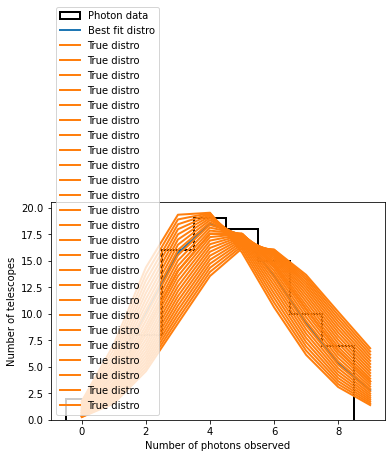

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

bins = np.arange(np.max(counts)+1)-0.5
xs = bins+0.5
plt.hist(counts, bins=bins, label="Photon data", fill=False, histtype="step", color='k', linewidth=2)
plt.plot(xs, N * poisson.pmf(xs, result.params['l'].value), label="Best fit distro", color="C0", linewidth=2)
plt.plot(xs, N * poisson.pmf(xs,LAMBDA), label="True distro", color="C1", linewidth=2)

####################
# Insert Code Here #
####################

for i in range(12):
    q1 = LAMBDA + (i/6)*result.params['l'].stderr
    q2 = LAMBDA - (i/6)*result.params['l'].stderr
    plt.plot(xs, N * poisson.pmf(xs,q1), label="True distro", color="C1", linewidth=2)
    plt.plot(xs, N * poisson.pmf(xs,q2), label="True distro", color="C1", linewidth=2)

minimum = None # Placeholder Value - Fill in the correct line
maximum = None # Placeholder Value - Fill in the correct line

####################

#plt.fill_between(xs, minimum, maximum, alpha=0.5, color="C0")
plt.xlabel("Number of photons observed")
plt.ylabel("Number of telescopes")
plt.legend()

#### <span style="color:red">>>>QUESTION 4.3</span>

Suppose one of our telescopes also records information about the energy of each photon from the star. Over time, we could produce a histogram of these values representing the spectrum of the star's light output. Suppose we also have a model of the star that predicts a certain spectrum, given some parameters. How could we make a best estimate of these parameters (assuming systematic uncertainties are small relative to statistical uncertainties)?

#### <span style="color:red">>>>ANSWER</span>

We could simply construct a maximum likelihood function for Poisson-distributed values about the expected spectrum and minimize with respect to the model parameters.

<!--
#solution
We could simply construct a maximum likelihood function for Poisson-distributed values about the expected spectrum and minimize with respect to the model parameters.
-->